<a href="https://colab.research.google.com/github/ShalvenVighnes/Heart-Disease/blob/main/GROUP5_Heart_disease_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Diagnosing Heart Disease based on Patients Medical Data**
**Group Member names **                            
 Shalven Vighnes (S2182885)   
Junhong Su (S2152396)                         
   Meng Wang(S2164723)                  
  Viktor Anchutin(S2150637)                      

In [1]:
#@title imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import palettable
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: ignored

In [ ]:
#@title common helper functions

def plot_missing(data = pd.DataFrame):
  na_values_percent = data.isna().sum().sort_values(ascending=False) \
    .apply(lambda x: (x, round(x / data.index.size * 100, 2))) # (count, %)
  na_values_percent.apply(lambda x: x[1]).plot.bar() # (plot %)
  plt.ylabel("Percentage", size=14)
  plt.title('Missing values')

#Methodology
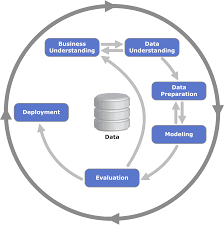


CRISP-DM, which stands for Cross-Industry Standard Process for Data Mining, is an industry-proven way to guide your data mining efforts.
     
-As a methodology, it includes descriptions of the typical phases of a project, the tasks involved with each phase, and an explanation of the relationships between these tasks.       
-As a process model, CRISP-DM provides an overview of the data mining life cycle.

The life cycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases.       
The CRISP-DM model is flexible and can be customized easily.



#Business Understanding

## Determine Business Objectives

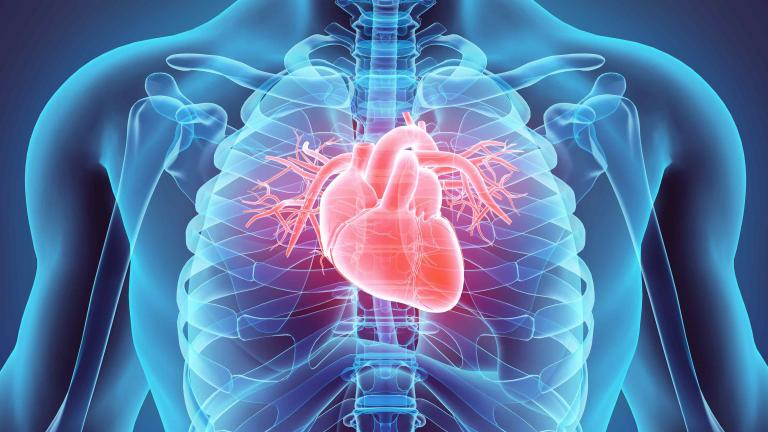

```

```

<font size=4>**Background:**<fone>

Among the top ten causes of death in the world in the past 20 years, heart disease has occupied the first place. Heart disease presents a younger trend. With the rapid increase in the number of heart disease patients, the shortage of medical resources has gradually emerged. Many patients need to be checked every day. Therefore, a method is needed to enable doctors to quickly diagnose, thereby improving the efficiency of medical resource utilization and reducing hospital medical treatment. costs and patient diagnostic charges. In recent years, with the development of machine learning, a large number of machine learning models have been applied to the medical field, making important contributions to the medical industry.

<font size=4>**Business Objective:**<fone>

Enables healthcare facilities to quickly diagnose patients with heart disease.

<font size=4>**Business Success Criteria:**<fone>

1.It can quickly and accurately predict whether a patient is suffering from heart disease, and the prediction accuracy rate is over 80%.

2.The project can be completed on time.

## Determine Data Mining Goal

Use historical information about previous heart disease to develop models that can predict whether a potential patient will have heart disease. When the potential patient information is fed into the model, the result of whether the potential heart disease patient has heart disease or not will be obtained.

## Situation Assessment

### Inventory of Resources

**1.Data Resources**

Four datasets concerning heart disease diagnosis.


**2. Human Resources**

Four Junior Data Scientists.


**3. Instrument Resources**

Four computers capable of data storage, data analysis and programming.


### Constraints

*   Only four junior data scientists
*   Time is tight

#### Assumptions

This data set is from the 1980s, and the data set is old. As modern life changes, the factors that contribute to heart disease may change. So assuming the factors that cause heart disease don't change in the future.

#### Risks and Contingencies

*   Scheduling: Maybe the project is taking longer than expected
*   Data: data quality and coverage may be poor
*   The results did not meet expectations

#### emergency plan

* Arrange an online or offline meeting every week, report the completion status of each member in time, and provide help to members who are behind in progress.
* Analyze the data, understand the data, determine the quality and coverage of the data as early as possible, and set aside a period of time to re-merge other data, modify the data, or replace the data set.
* Check the experiment process to see if there is any error. If there is no error in the experimental process, the results can be accepted within an acceptable range.


#### Costs

Due to the availability of project data, the cost of this project is mainly time cost, which requires a lot of time for data analysis, model development and model evaluation.

#### Benefits

It can quickly and accurately predict whether a potential patient has heart disease, improve the utilization efficiency of medical resources, and reduce the diagnosis cost of potential patients.

#### Terminology

1. Machine Learning:Machine learning (ML) is a field of research devoted to understanding and building "learning" methods, that is, methods of using data to improve performance on some set of tasks. It is considered part of artificial intelligence. Machine learning algorithms build models based on sample data (called training data) to make predictions or decisions without being explicitly programmed.
2. logistic regression, also known as logistic regression analysis, is a generalized linear regression analysis model, often used in data mining, automatic disease diagnosis, economic forecasting and other fields.
3. random forest：Random forest, or random decision forest, is an ensemble learning method for classification, regression, and other tasks that operates by building a large number of decision trees during training. For classification tasks, the output of a random forest is the class chosen by the majority of trees. For regression tasks, returns the mean or average prediction of a single tree.
4. Neural networks: Neural networks, also known as artificial neural networks (ANN) or simulated neural networks (SNN), are a subset of machine learning and are at the heart of deep learning algorithms. Its name and structure are inspired by the human brain, mimicking the way biological neurons signal each other. An artificial neural network (ANN) consists of layers of nodes, including an input layer, one or more hidden layers, and an output layer.
Data Mining Success Criteria.
5. Support Vector Machine: In machine learning,SVM(also known as support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.Developed by Vladimir Vapnik and colleagues at AT&T Bell Laboratories.

### Project Plan

|  Phase   | Time  |  Resources   | Risks  |
|  ----  | ----  |  ----  | ----  |
| Business understanding  | 1 week | All analysts and datasets  | wrong direction |
| Data understanding  | 1 week | All analysts and datasets  | Data problems, technology problems |
| Data preparation  | 2 week | All analysts and datasets  | Data problems, technology problems |
| Modeling  | 2 week | All analysts and datasets、Model develop tools  | technology problems |
| Evaluation  | 1 week | All analysts and datasets、Model develop tools  | technology problems、inability to implement results |
| Deployment  | 1 week | All analysts  | inability to implement results |

#Data Understanding

## Collecting initial data

###Data Source
The data is available at UCI machine learning repository https://archive.ics.uci.edu/ml/datasets/heart+disease

The website contains 4 datasets concerning heart disease diagnosis.The data for these datasets was collected from the four following locations:

    1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

There are 2 versions of each dataset:
* Full dataset with 76 attributes
* Dataset with 14 attributes

The reduced dataset exists because only the subset of 14 attributes has been used in prior reseach and experiments.


Links to datasets:
- Cleveland data - https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
- Hungarian data - https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
- Switzerland data - https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data
- V.A. Longbeach data - https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data

Our initial datasets have `.data` file format:
- `processed.switzerland.data`
- `processed.cleveland.data`
- `processed.hungarian.data`
- `processed.va.data`

We create a single dataset by combining these four.

### Creating a single dataset

The datasets have the same columns, they don't have headers, and missing values are provided as `?`.

In [ ]:
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak",
          "slope", "ca", "thal", "disease"]
sdf = pd.read_csv("processed.switzerland.data", header=None, names=columns, na_values='?')
cdf = pd.read_csv("processed.cleveland.data", header=None, names=columns, na_values='?')
hdf = pd.read_csv("processed.hungarian.data", header=None, names=columns, na_values='?')
vdf = pd.read_csv("processed.va.data", header=None, names=columns, na_values='?')

df = pd.concat([sdf, cdf, vdf, hdf], ignore_index=True)

## Describing the data

### The combined dataset contains 14 parameters and 920 records.

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35.0,1.0,4.0,NaN,0.0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,52.0,1.0,4.0,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
916,54.0,0.0,3.0,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
917,56.0,1.0,4.0,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
918,58.0,0.0,2.0,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  disease   920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB


### Attributes

#### Numerical attributes

- `age`: age in years, numerical

- `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
- `chol` - cholesterol in mg/dl
- `thalach` - maximum heart rate achieved
- `oldpeak` - ST depression induced by exercise relative to rest. ‘ST’ relates to the positions on the electrocardiographic (ECG) plot.
- `ca` - number of major vessels (0-3) colored by flourosopy. Fluoroscopy is one of the most popular non-invasive coronary artery disease diagnosis. It enables the doctor to see the flow of blood through the coronary arteries in order to evaluate the presence of arterial blockages.

#### Categorical attributes
- `sex`: sex
    - 1 = male
    - 0 = female
- `cp`: chest pain type
    - 1: typical angina
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: asymptomatic
- `fbs` - fasting blood sugar > 120 mg/dl
    - 1 = true
    - 0 = false
- `restecg` - resting electrocardiographic (ECG) results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- `exang` - exercise induced angina. Angina is a type of chest pain caused by reduced blood flow to the heart.
    - 1 - yes
    - 0 - no
- `slope` - the slope of the peak exercise ST segment. (ECG)
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- `thal` - A blood disorder called thalassemia
     - 3: normal blood flow
     - 6: fixed defect (no blood flow in some part of the heart)
     - 7: reversable defect (a blood flow is observed but it is not normal)
- `disease` - refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Exploratory data analysis





In [ ]:
#@title Dataframe for EDA
df_eda = df.copy()

In [ ]:
#@title EDA helper functions


def plot_categorical(data=pd.DataFrame,
                     column=str,
                     labels=[],
                     target='disease',
                     target_labels=['healthy', 'heart disease'],
                     title='', font = 10, ax = None):
    crosstab = pd.crosstab(data[column], data[target])
    ax = crosstab.plot(kind='bar', figsize=(15, 7), rot = 0, fontsize=font, ax=ax)
    x = np.arange(len(labels))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(target_labels)
    plt.ylabel("count", size=14)
    plt.title(title)

    bars =  ax.patches

    #compute percents
    total_by_category = crosstab.sum(axis=1)
    healthy_perc = round((crosstab[0] / total_by_category ) * 100)


    for (i, bar) in enumerate(bars):
      prc = healthy_perc.iloc[i] if i < len(healthy_perc) else 100 - healthy_perc.iloc[i % len(healthy_perc)]
      plt.annotate(str(int(prc)) + '%',
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')


def plot_numeric(data=pd.DataFrame, column=str, title=str):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(20, 7)

    #with respect to target
    healthy = data.loc[data.disease == 0, column]
    sick = data.loc[data.disease > 0, column]
    healthy.plot.density(ax=ax[0])
    sick.plot.density(ax=ax[0])
    ax[0].legend(['healthy', 'heart disease'])

    data.boxplot(by='disease', column= [column], ax=ax[1])

    fig.suptitle(title, fontsize = 19)


def describe_numeric(data=pd.DataFrame, column=str):
    temp = data[[column, 'disease']].copy()
    temp['healthy'] = data[data.disease == 0][column]
    temp['sick'] = data[data.disease == 1][column]
    return temp[[column, 'healthy', 'sick']].describe()

##### For analysis perposes we reduce the numer of disease categories to 2: people with heart disease (1) and people without heart disease (0).

In [ ]:
df_eda.disease = df['disease'].apply(lambda x: 1 if x > 0 else 0)

### Numeric data summary

Extract a subset of numeric data from the original dataset.

In [ ]:
df_eda_numeric=df_eda.loc[:,['age','trestbps','chol','thalach','oldpeak']]

The figure below summarizes the mean, standard deviation, minimum,25th percentile, median, 75th percentile, and maximum of the numeirical data.

In [ ]:
df_eda_numeric.describe()

,age,trestbps,chol,thalach,oldpeak
count,920.000000,861.000000,890.000000,865.000000,858.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788
std,9.424685,19.066070,110.780810,25.926276,1.091226
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,175.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000
75%,60.000000,140.000000,268.000000,157.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


Check the correlation between numericial attributes.

               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.244253 -0.086234 -0.365778  0.258243
trestbps  0.244253  1.000000  0.092853 -0.104899  0.161908
chol     -0.086234  0.092853  1.000000  0.236121  0.047734
thalach  -0.365778 -0.104899  0.236121  1.000000 -0.151174
oldpeak   0.258243  0.161908  0.047734 -0.151174  1.000000


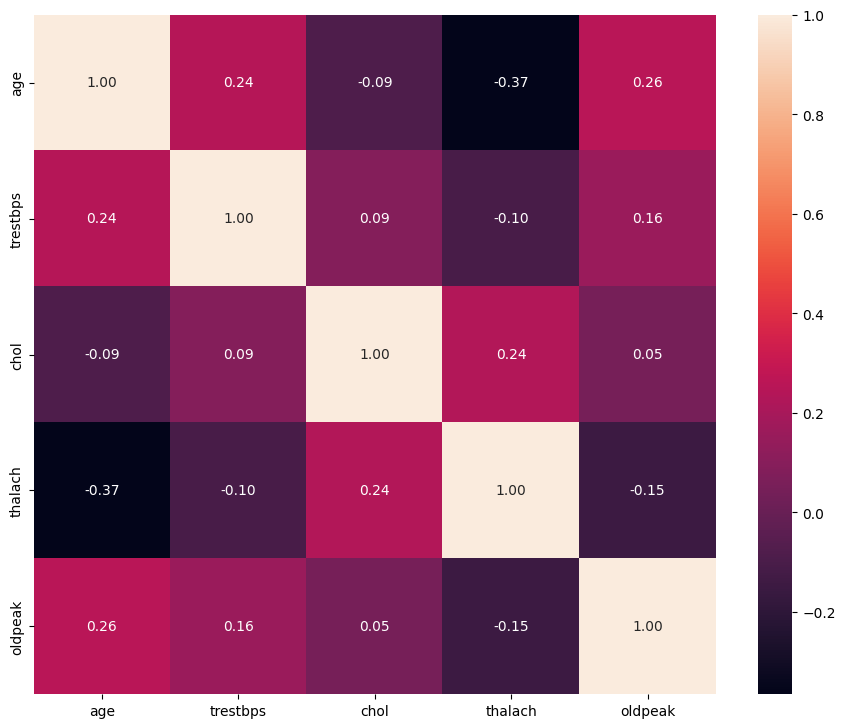

In [ ]:
dcorr=df_eda_numeric.corr(method='pearson')
dcorr.shape
print(dcorr)
plt.figure(figsize=(11,9),dpi=100)
sns.heatmap(data=dcorr,annot=True,fmt=".2f")

### Categorical data summary

#### Summary

The following pie chart shows the quantity of each category of categorical data.

In [ ]:
#@title Quantity of each category of categorical data
categorical = ['sex','cp','fbs','restecg','exang', 'disease', 'thal', 'slope']
for col in categorical:
  print(df_eda[col].value_counts())

1.0    726
0.0    194
Name: sex, dtype: int64
4.0    496
3.0    204
2.0    174
1.0     46
Name: cp, dtype: int64
0.0    692
1.0    138
Name: fbs, dtype: int64
0.0    551
2.0    188
1.0    179
Name: restecg, dtype: int64
0.0    528
1.0    337
Name: exang, dtype: int64
1    509
0    411
Name: disease, dtype: int64
3.0    196
7.0    192
6.0     46
Name: thal, dtype: int64
2.0    345
1.0    203
3.0     63
Name: slope, dtype: int64


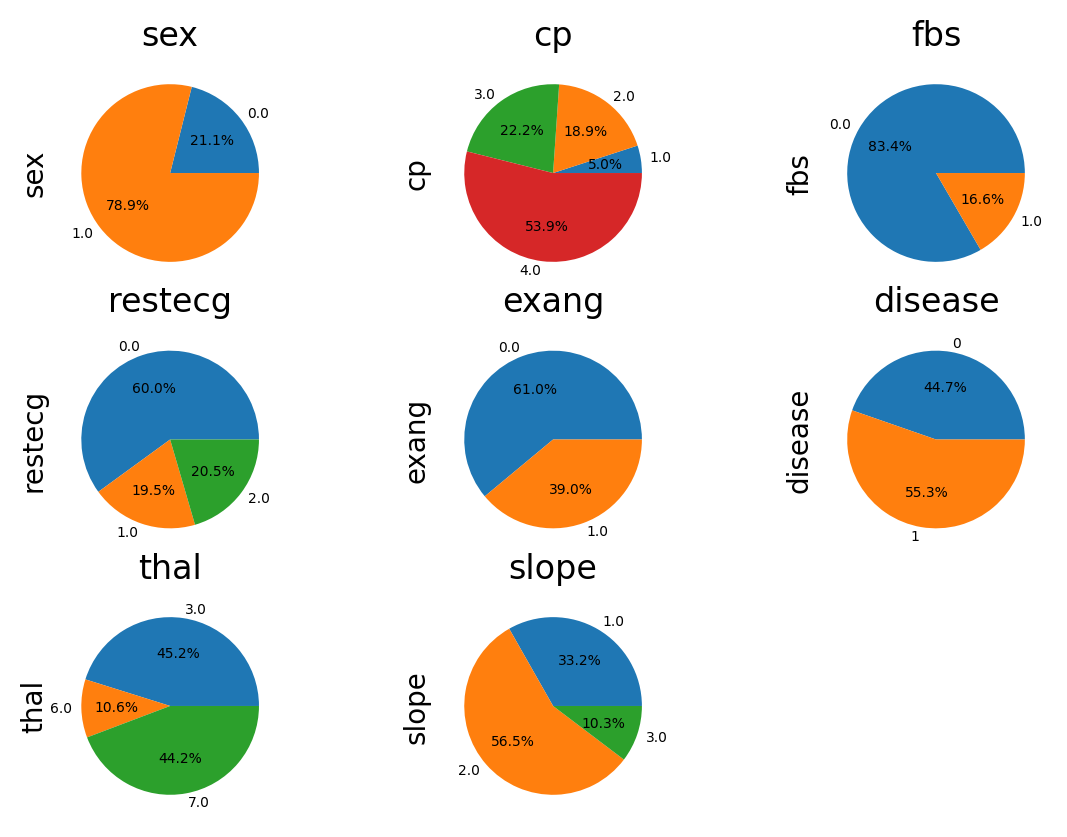

In [ ]:
#@title Proportions of categorical data

plt.figure(figsize=(5,5),dpi=200)
for (i, col) in enumerate(categorical):
  plt.subplot(3,3,i+1)
  df_eda[col].value_counts().sort_index().plot(kind='pie', figsize=(7,5), autopct='%1.1f%%', title = col, textprops={'fontsize': 5})


### Analysing risk factors for heart disease

#### Cholesterol ('chol')

#####Cholesterol has a lot of 0 values, which is not possible. We will consider them missing.

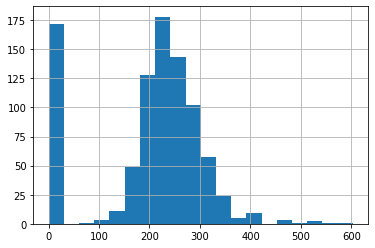

In [ ]:
df_eda.chol.hist(bins=20)
df_eda['chol'] = df['chol'].replace({0:np.nan})

##### Analysis

People with heart disease on average have higher colesterol level.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


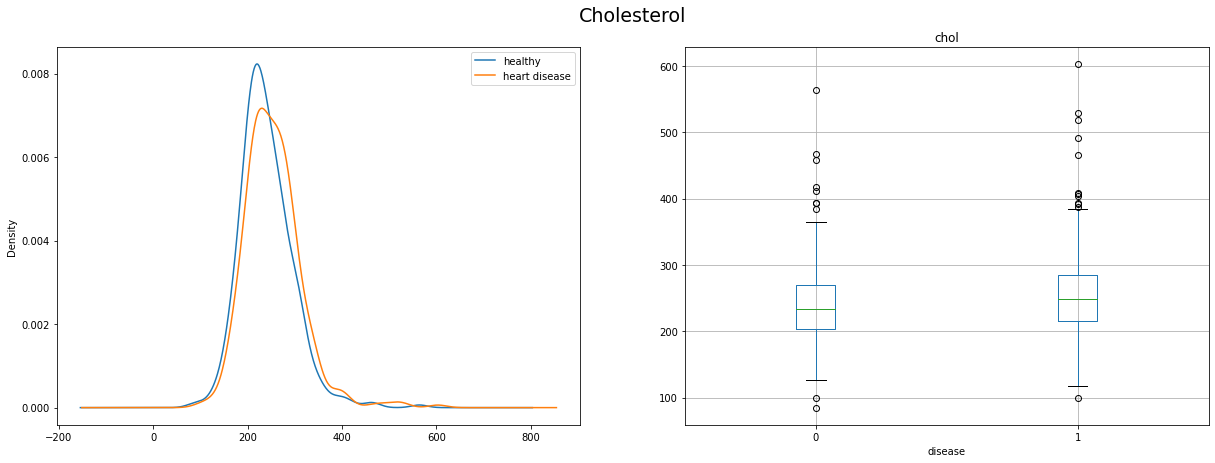

In [ ]:
plot_numeric(df_eda, 'chol', 'Cholesterol')

In [ ]:
describe_numeric(df_eda, 'chol')

,chol,healthy,sick
count,718.000000,372.000000,346.000000
mean,246.832869,240.158602,254.008671
std,58.527062,55.767559,60.620439
min,85.000000,85.000000,100.000000
25%,210.000000,204.000000,216.000000
50%,239.500000,233.000000,248.000000
75%,276.750000,270.250000,284.750000
max,603.000000,564.000000,603.000000


Binning shows that people with cholesterol level more than 254 mg/dl have more than 50% chance of having a heart disease.  

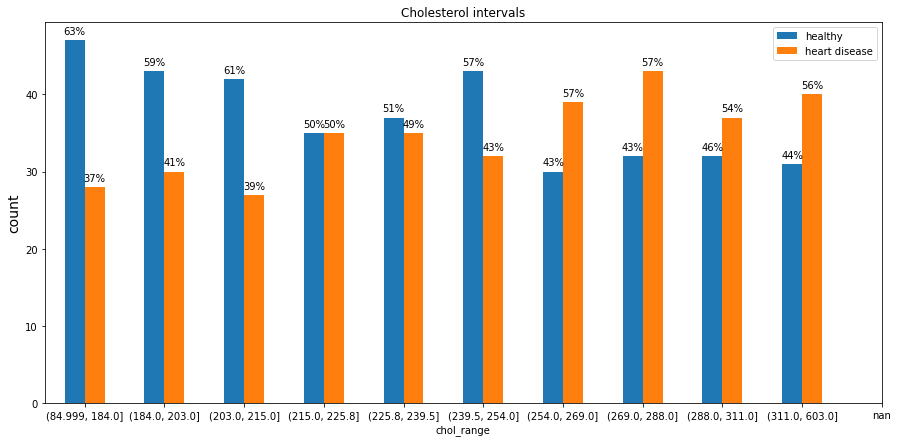

In [ ]:
df_eda['chol_range'] = pd.qcut(df_eda['chol'], 10, duplicates = 'drop')
plot_categorical(df_eda, 'chol_range', df_eda.chol_range.unique().sort_values(), title = 'Cholesterol intervals')

#### Age

People with heart
disease on average are about 5 years older than healthy people.

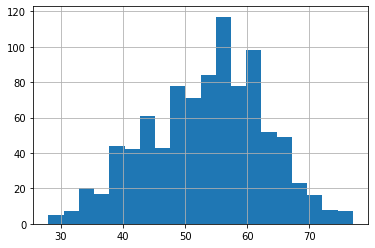

In [ ]:
df_eda.age.hist(bins=20)


In [ ]:
describe_numeric(df_eda, 'age')

,age,healthy,sick
count,920.000000,411.000000,509.000000
mean,53.510870,50.547445,55.903733
std,9.424685,9.433700,8.718959
min,28.000000,28.000000,31.000000
25%,47.000000,43.000000,51.000000
50%,54.000000,51.000000,57.000000
75%,60.000000,57.000000,62.000000
max,77.000000,76.000000,77.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


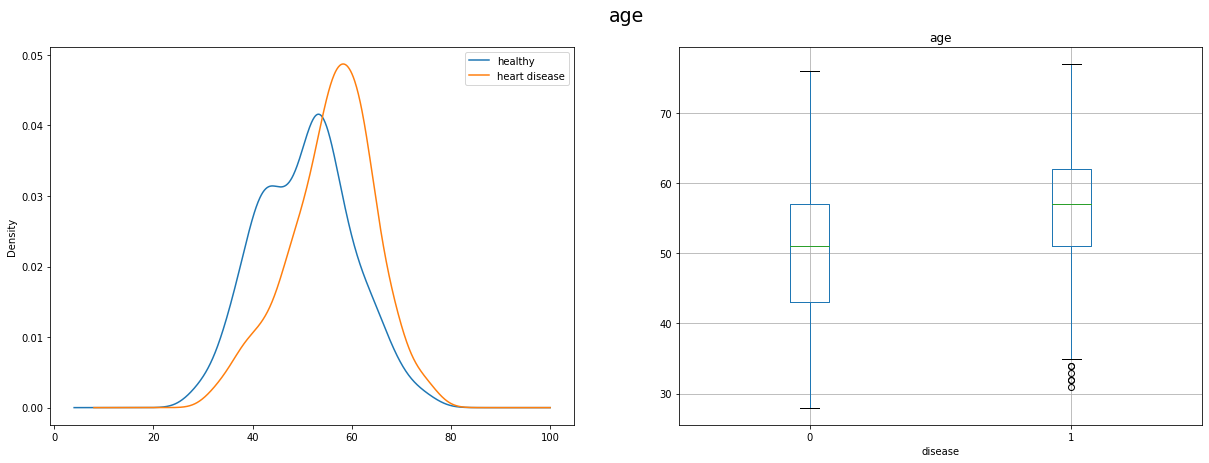

In [ ]:
plot_numeric(df_eda, 'age', 'age')

We can see that the risk of getting heart disease increases after the age of 54.

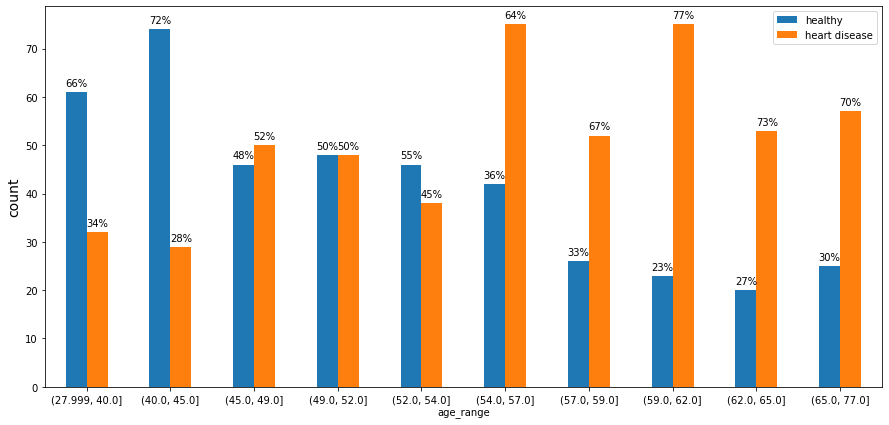

In [ ]:
df_eda['age_range'] = pd.qcut(df_eda['age'], 10)
plot_categorical(df_eda, 'age_range', df_eda.age_range.unique().sort_values())

#### Resting blood pressure ('trestbps')

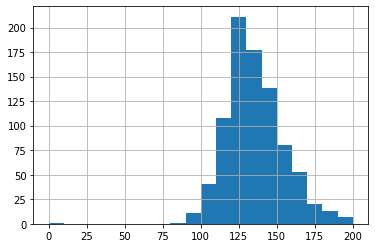

In [ ]:
df_eda.trestbps.hist(bins=20)

We have one unrealistic values of 0, we should replace it with na for analysis.

In [ ]:
df_eda.trestbps.replace({0:np.nan}, inplace=True)

People with heart disease on average have a slightly higher blood pressure than healthy patients.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


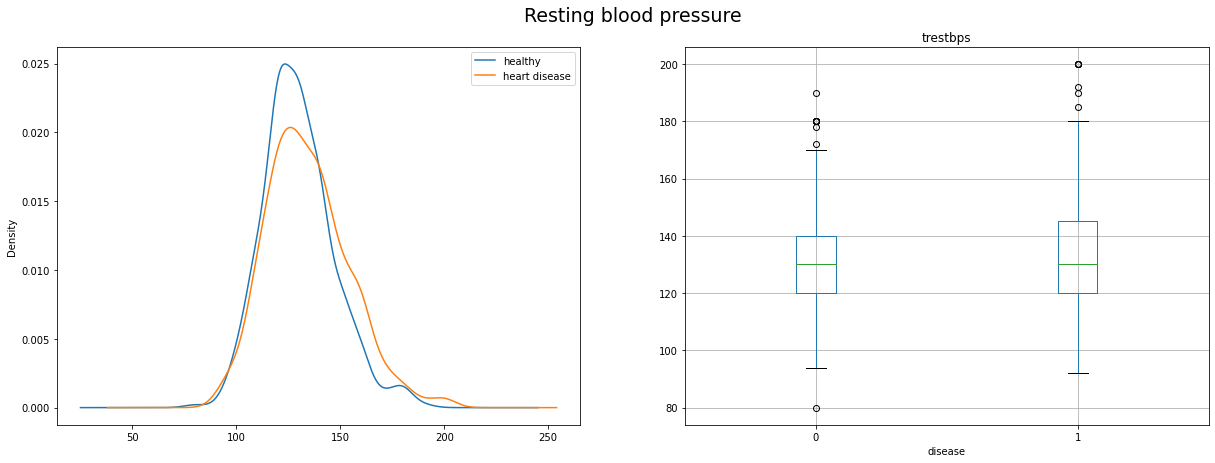

In [ ]:
plot_numeric(df_eda, 'trestbps', 'Resting blood pressure')

In [ ]:
describe_numeric(df_eda, 'trestbps')

,trestbps,healthy,sick
count,860.000000,391.000000,469.000000
mean,132.286047,129.913043,134.264392
std,18.536175,16.869867,19.617889
min,80.000000,80.000000,92.000000
25%,120.000000,120.000000,120.000000
50%,130.000000,130.000000,130.000000
75%,140.000000,140.000000,145.000000
max,200.000000,190.000000,200.000000


Most patients with normal blood pressure do not have heart disease, while most patients with elevated blood pressure have heart disease.

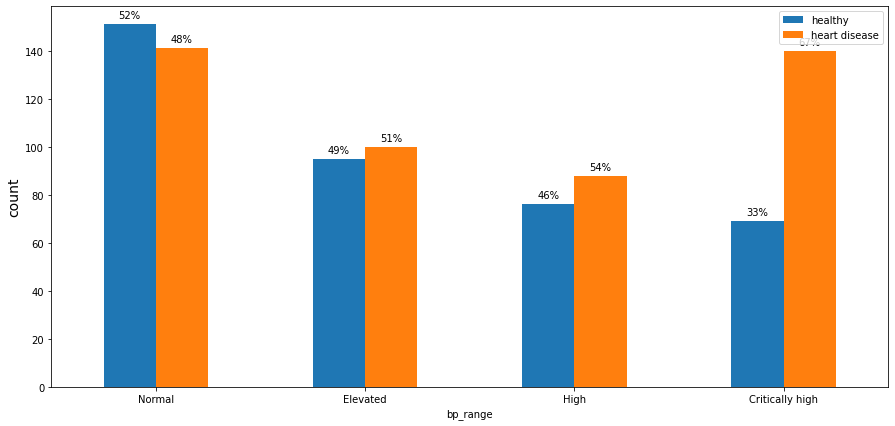

In [ ]:
bins = [0, 120, 130, 140, np.inf]
labels = ['Normal', 'Elevated', 'High', 'Critically high']
df_eda['bp_range'] = pd.cut(df_eda['trestbps'], bins)
plot_categorical(df_eda, 'bp_range', labels)

#### Exercise induced angina ('exang')

Most of the patients with heart disease experienced angina during the exercise, while the majority in the healthy group had no such symptoms.

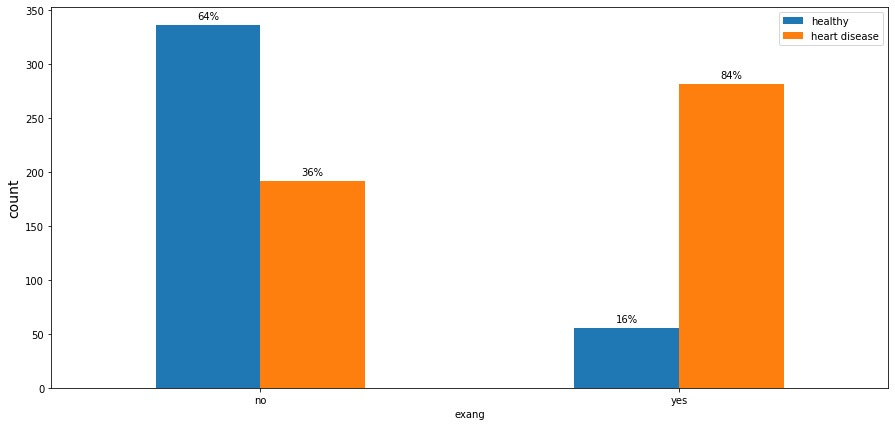

In [ ]:
plot_categorical(df_eda, 'exang', ['no', 'yes'])

#### Number of Blocked Vessels ('ca')

The chance of having heart disease increases proportionally to the number of blocked vessels. Patients with 0 blocked vessels have only 27% chance of having heart disease. The value reaches 85% chance for the group with 3 blocked vessels.

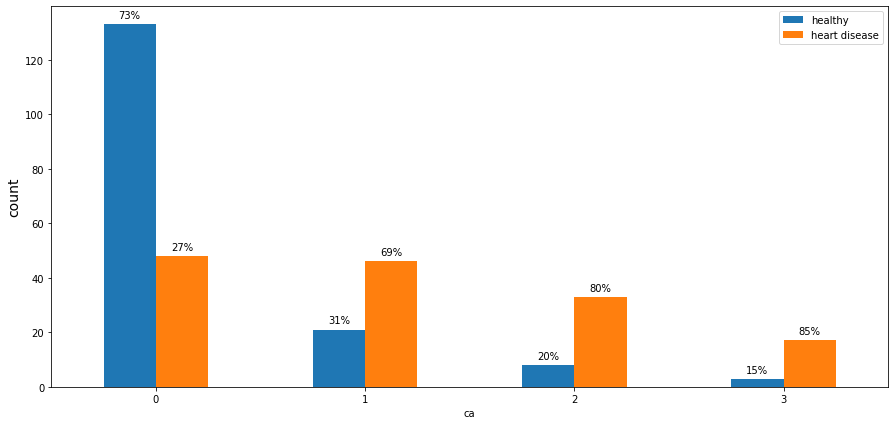

In [ ]:
labels=["0", "1", "2", "3"]
plot_categorical(df_eda, 'ca', labels)

In [ ]:
df.ca.isna().sum()

611

#### Gender

The majority of men in the dataset have heart disease, while only 26% of women are unhealthy.

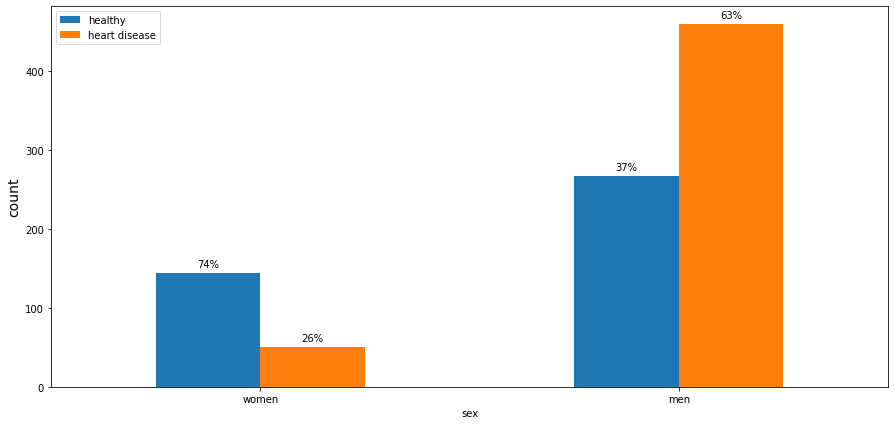

In [ ]:
plot_categorical(df_eda, 'sex', ['women', 'men'])

#### Chest pain type ('cp')

Amongst the patients with no chest pain almost 80% had heart disease. Patients with the atypical angina had the lowest level of heart disease rate. Overall, we can not say if a chest pain can be considered as a risk factor for a heart disease.

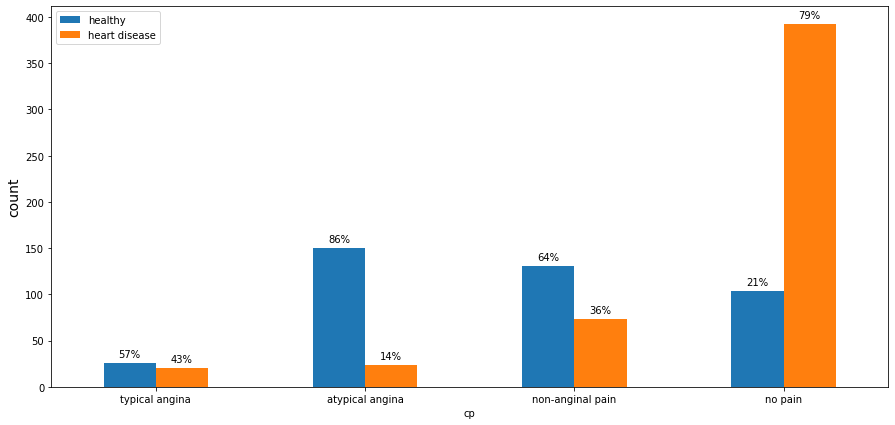

In [ ]:
labels=['typical angina', 'atypical angina', 'non-anginal pain', 'no pain']
plot_categorical(df_eda, 'cp', labels)

In [ ]:
df.cp.isna().sum()

0

#### Fasting blood sugar

In our dataset most people don't have a high sugar level. But among those who do, almost 70% have heart disease.

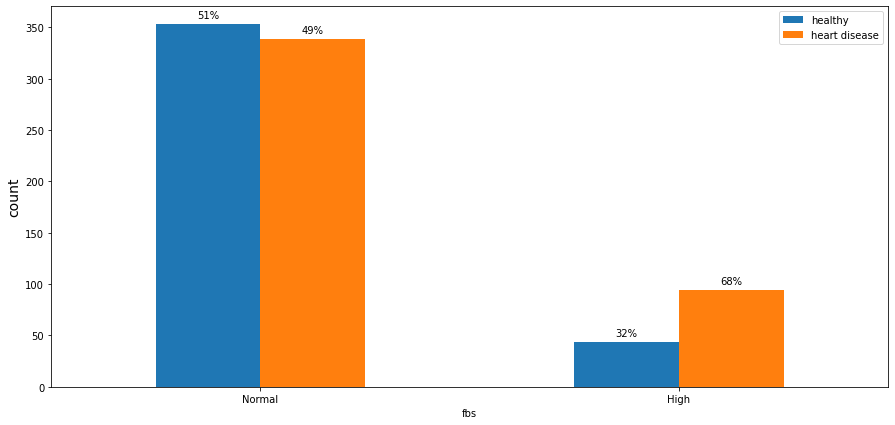

In [ ]:
plot_categorical(df_eda, 'fbs', ['Normal', 'High'])

#### Resting electrocardiographic results ('restecg')

Patients in the categories with type 1 and type 2 abnormalities have higher chance of getting a heart disease than the group with normal ECG.

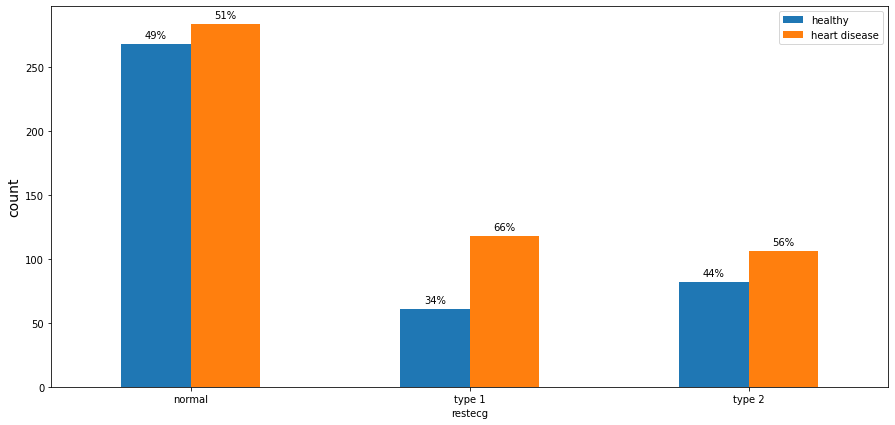

In [ ]:
labels=['normal', 'type 1', 'type 2']
plot_categorical(df_eda, 'restecg', labels)

#### Maximum heart rate achieved ('thalach')

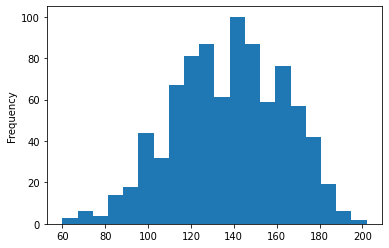

In [ ]:
df_eda.thalach.plot.hist(bins=20)

Patients without heart disease are able to reach a higher maximum heart rate than patients with the disease.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


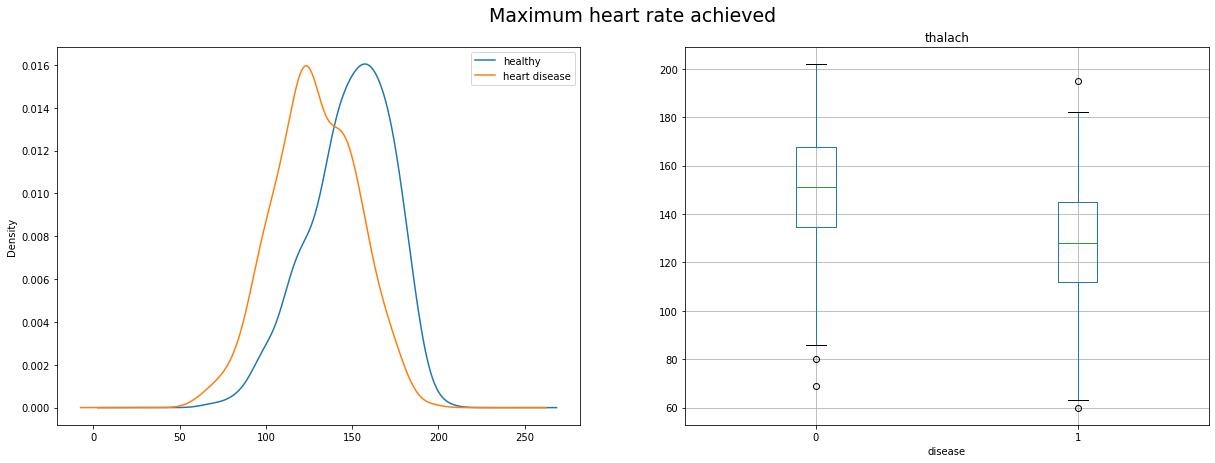

In [ ]:
plot_numeric(df_eda, 'thalach', 'Maximum heart rate achieved')

#### ST depression (oldpeak)

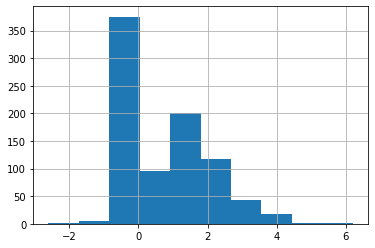

In [ ]:
df_eda.oldpeak.hist()

We can see that there are some negative values. We'll have to replace with nan.

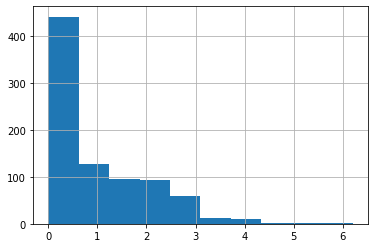

In [ ]:
df_eda['oldpeak'] = df_eda['oldpeak'].apply(lambda x: np.nan if x < 0 else x)
df_eda.oldpeak.hist()

Oldpeak is another ECG parameter measuring ST depression during the exercise. It represents a distance on the ECG plot between specific points. There's a notable difference in distributions between the groups. Sick people on average have higher value of the parameter.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


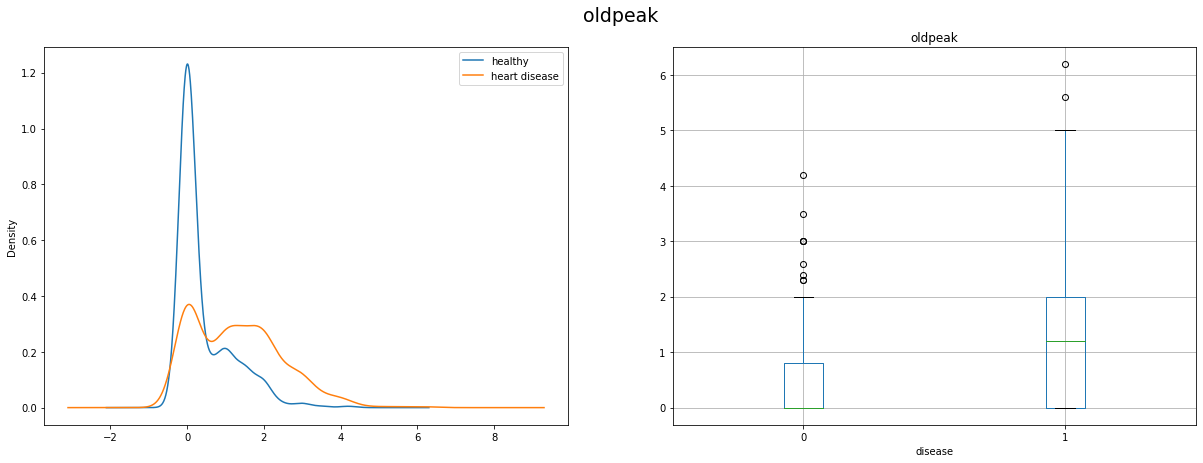

In [ ]:
plot_numeric(df_eda, 'oldpeak', 'oldpeak')

In [ ]:
describe_numeric(df_eda, 'oldpeak')

,oldpeak,healthy,sick
count,846.000000,387.000000,459.000000
mean,0.906265,0.425840,1.311329
std,1.071192,0.712184,1.153295
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.200000
75%,1.500000,0.800000,2.000000
max,6.200000,4.200000,6.200000


We can see that patients with high olpeak values have higher chance of having herat disease.

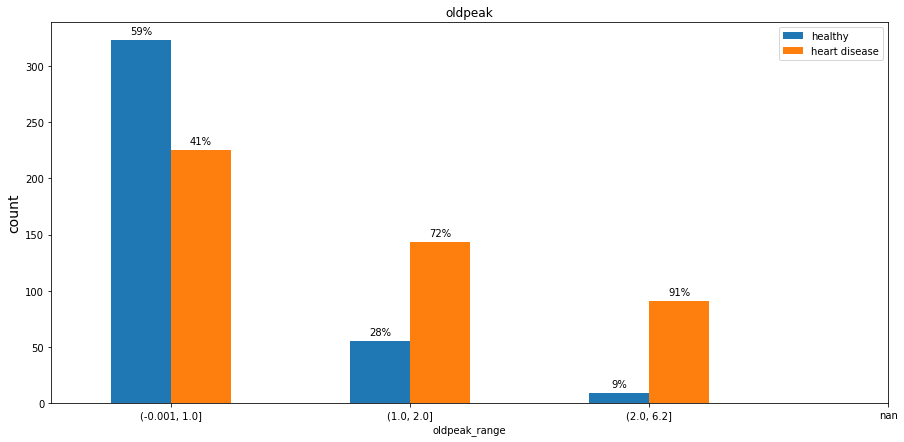

In [ ]:
df_eda['oldpeak_range'] = pd.qcut(df_eda['oldpeak'], 5, duplicates = 'drop')
plot_categorical(df_eda, 'oldpeak_range', df_eda.oldpeak_range.unique().sort_values(), title = 'oldpeak')

#### The slope of the peak exercise ST segment ('slope')

This is another ECG parameter, measured during the exercise. Almost 80% of the patients with 'flat' or 'downslopping' slope parameter had heart disease. Most of the people with the 'upslopping' slope were healthy.

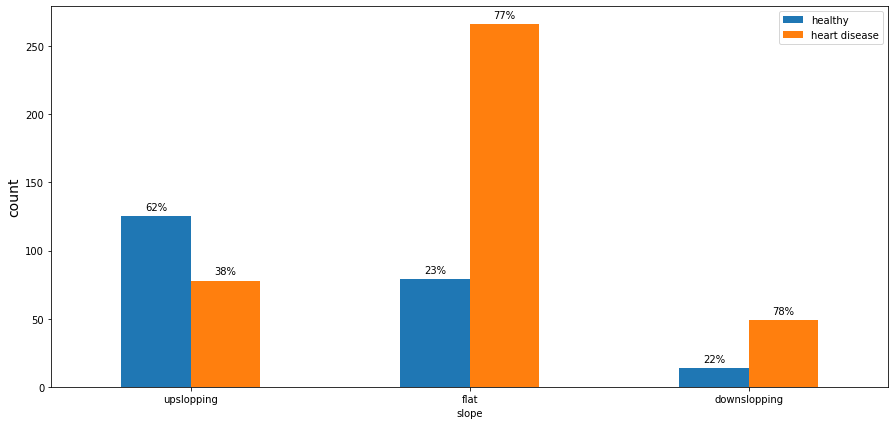

In [ ]:
labels=["upslopping", "flat", "downslopping"]
plot_categorical(df_eda, 'slope', labels)

#### Thalassemia blood disorder ('thal')

We can see that people with this blood disorder are at risk of having heart disease with almost 80% for both type 1 and type 2 disorders.

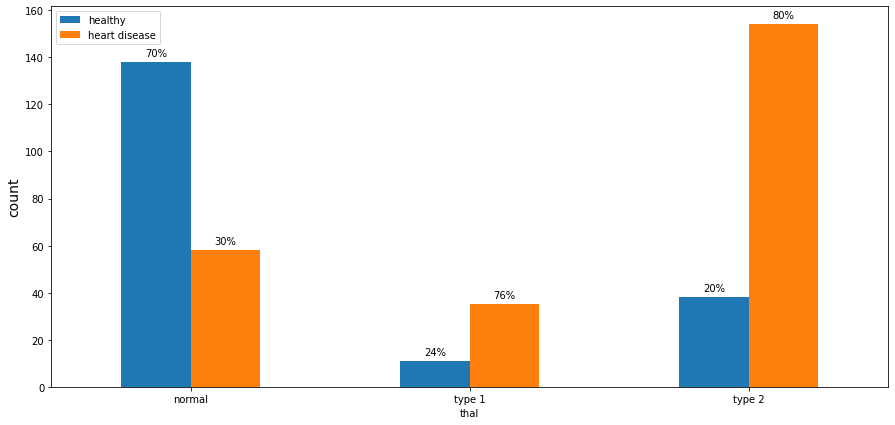

In [ ]:
labels=['normal','type 1','type 2']
plot_categorical(df_eda, 'thal', labels)

#### Numeric attributes relationships

Younger patients are able to achieve higher maximum heart rate. Patients with heart disease are older and have lower maximum heart rate.

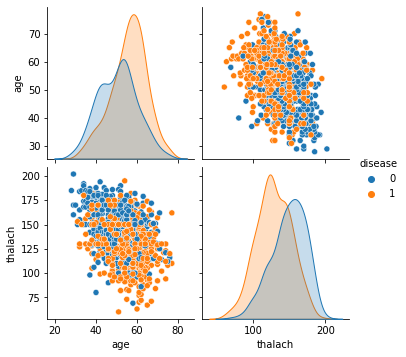

In [ ]:
sns.pairplot(df_eda, hue='disease', vars=['age', 'thalach'])

We can see that blood pressure is higher in older patients. But these factors do not form a clear separation between healthy and sick patients.

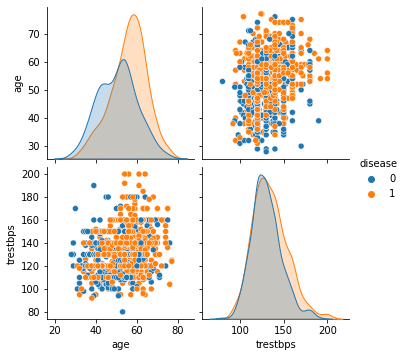

In [ ]:
sns.pairplot(df_eda, hue='disease', vars=['age', 'trestbps'])

### EDA colclusion

Exploratory data analysis identified the following groups with a high risk of heart disease:
 - Patients with high cholesterol
 - Patients older than 54 years old
 - Male patients
 - Patients with high blood sugar
 - Patients with abnormalities in their ECG
 - Patient low maximum heart rate
 - Patients with high oldpeak value
 - Patients with slope that flat or downsloping
 - Patients with blocked heart vessels
 - Patients with thalassemia blood disorder
 - Patients with high blood pressure, more than 120 mmHg

## Data quality

### Incorrect values

There are some incorrect values in our dataset as we have discovered.
* Cholesterol ('chol') has lots of zeros.
* ST depression ('oldpeak') has some negative values. In the existing research this parameter is >= 0.
* Resting blood pressure ('trestbps') has one zero value.

### Missing values

We count incorrect values as missing values.

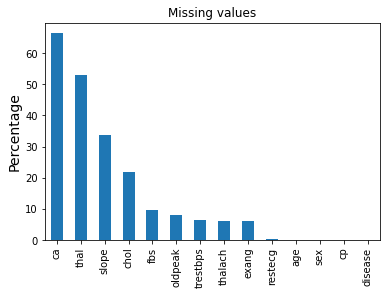

In [ ]:
df_missing = df.copy()
df_missing.chol = df.chol.replace({0:np.nan})
df_missing.trestbps = df.trestbps.replace({0:np.nan})
df_missing.loc[df.oldpeak < 0, 'oldpeak'] = np.nan

plot_missing(df_missing)

# Data Preparation

##Data cleaning

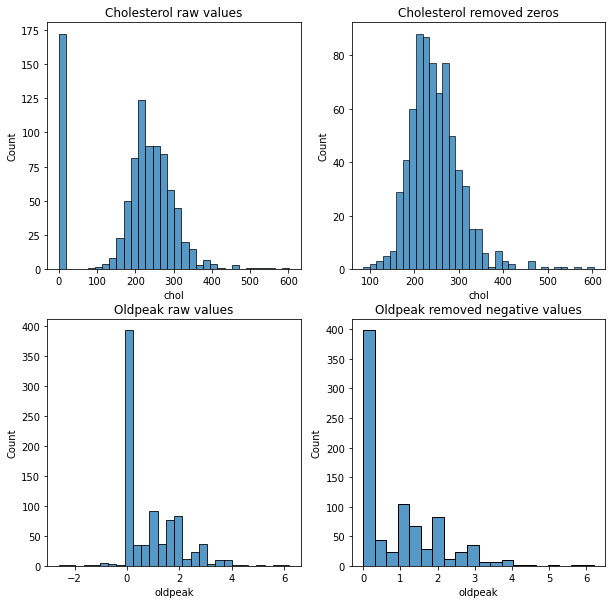

In [ ]:
#@title Replace incorrect values with NA

def remove_incorrect(data=pd.DataFrame):
  copy=df.copy()
  copy.chol.replace(0,np.nan,inplace=True)
  copy.trestbps.replace(0,np.nan,inplace=True)
  copy.loc[copy['oldpeak'] < 0, "oldpeak"] = np.nan
  return copy

df_clean = remove_incorrect(df)

#plot the result
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

#chol
sns.histplot(data=df, x="chol", ax = axs[0,0])
axs[0, 0].title.set_text('Cholesterol raw values')
sns.histplot(data=df_clean, x="chol", ax = axs[0,1])
axs[0, 1].title.set_text('Cholesterol removed zeros')

#oldpeak
sns.histplot(data=df, x="oldpeak", ax = axs[1,0])
axs[1, 0].title.set_text('Oldpeak raw values')
sns.histplot(data=df_clean, x="oldpeak", ax = axs[1,1])
axs[1, 1].title.set_text('Oldpeak removed negative values')

In [ ]:
#@title Delete columns with more than 30% missing data
df_reduced = df_clean.drop(['ca', 'thal', 'slope'],axis=1)
df_reduced.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,disease
0,32.0,1.0,1.0,95.0,NaN,NaN,0.0,127.0,0.0,0.7,1


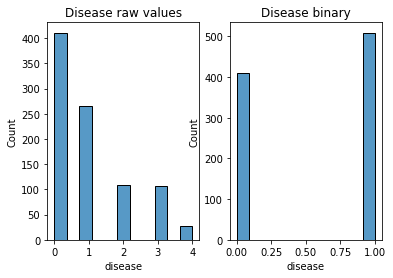

In [ ]:
#@title Collapse heart disease categories to 0 and 1 for binary classification
df_binary_target = df_reduced.copy()
df_binary_target.loc[df_binary_target.disease > 0, "disease"] = 1

fig, axs = plt.subplots(1, 2)
sns.histplot(data=df, x="disease", ax = axs[0])
axs[0].title.set_text('Disease raw values')
sns.histplot(data=df_binary_target, x="disease", ax = axs[1])
axs[1].title.set_text('Disease binary')

In [ ]:
#@title Remove duplicate rows
duplicates = df_binary_target.loc[df_binary_target.duplicated(), :] #to show the duplicate rows
df_no_duplicates = df_binary_target.drop_duplicates(keep='first') # to remove the duplicate rows and keeping the first one only
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,disease
613,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.0,1
728,49.0,0.0,2.0,110.0,NaN,0.0,0.0,160.0,0.0,0.0,0


### Outliers

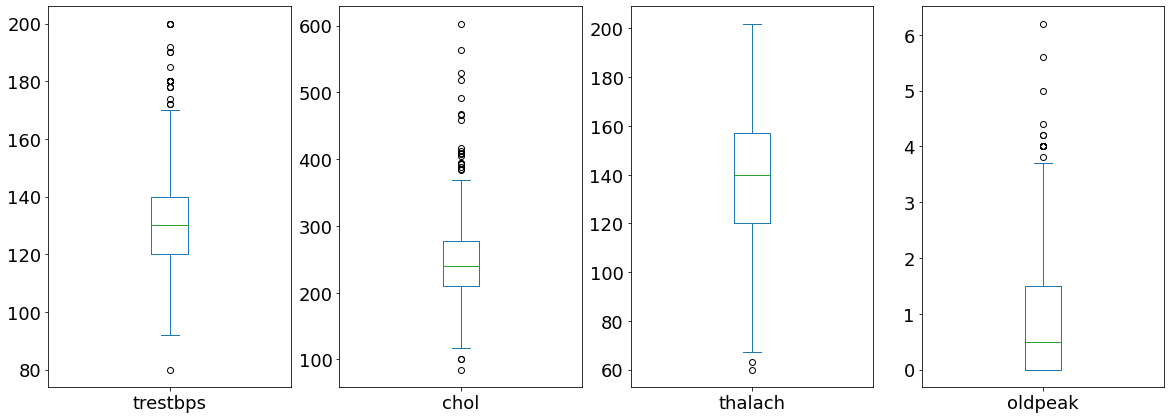

In [ ]:
#@title plot outliers

def find_outliers(data=pd.DataFrame):
    return [col for col in data.columns if has_outliers(data[col])]

def get_box_limits(col=pd.Series):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    return (ll, ul)

def has_outliers(col=pd.Series):
    ll, ul = get_box_limits(col)
    upper_outliers = col[col > ul].count() > 0
    lower_outliers = col[col < ll].count() > 0
    return upper_outliers or lower_outliers

outliers_columns = find_outliers(df_no_duplicates[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

fig, axs = plt.subplots(1, len(outliers_columns), figsize = (20, 7))
for (i, col) in enumerate(outliers_columns):
   df_no_duplicates[col].plot.box(ax = axs[i], fontsize = 18)

These values are real, and removing them might affect the modeling, so we keep them.

### Data imputation

In [ ]:
#@title Helper functions

from scipy.stats.stats import mode

def impute_cat(data=pd.DataFrame, cols=list):
  for col in cols:
    data[col + "_missing"] = data[col].isna().astype(int)
    data[col] = data[col].fillna(data[col].mode()[0])


def impute_num(data=pd.DataFrame, cols=list):
  for col in cols:
    data[col + "_missing"] = data[col].isna().astype(int)
    data[col] = data[col].fillna(data[col].median())

def plot_numeric_imputation(data_before=pd.DataFrame, data_after=pd.DataFrame, cols=list):
  fig, axs = plt.subplots(1, len(cols), figsize = (25, 5))
  for i, col in enumerate(cols):
    sns.kdeplot(data_before[col], color='b', shade=True, ax = axs[i], alpha = 0.07)
    sns.kdeplot(data_after[col], color='r', shade=True, ax = axs[i], alpha = 0.07)
    axs[i].legend(['Before imputation', 'After imputation'])

def plot_categorical_imputation(data_before=pd.DataFrame, data_after=pd.DataFrame, cols=list):
  fig, axs = plt.subplots(1, len(cols), figsize = (25, 5))
  for i, col in enumerate(cols):
    sns.histplot(data=data_before, x=col, ax=axs[i], color='b')
    sns.histplot(data=data_after, x=col, ax=axs[i], color='r', alpha=0.2)

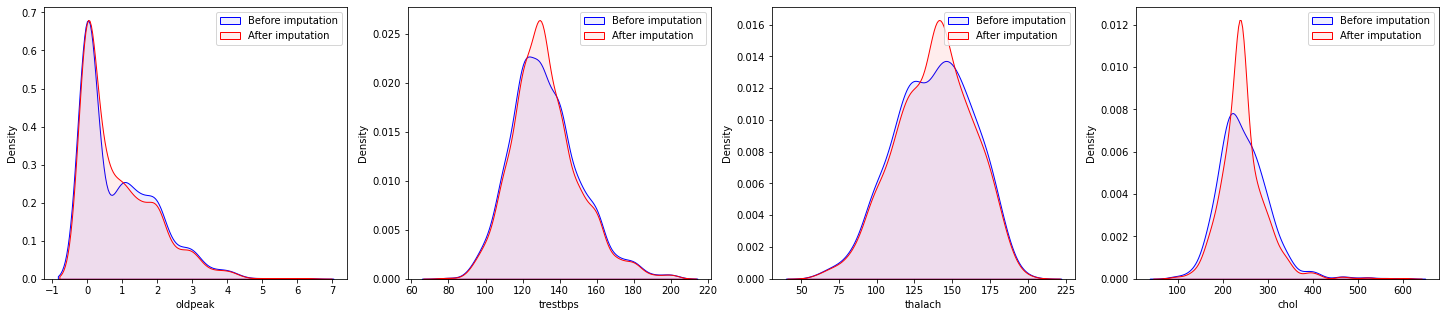

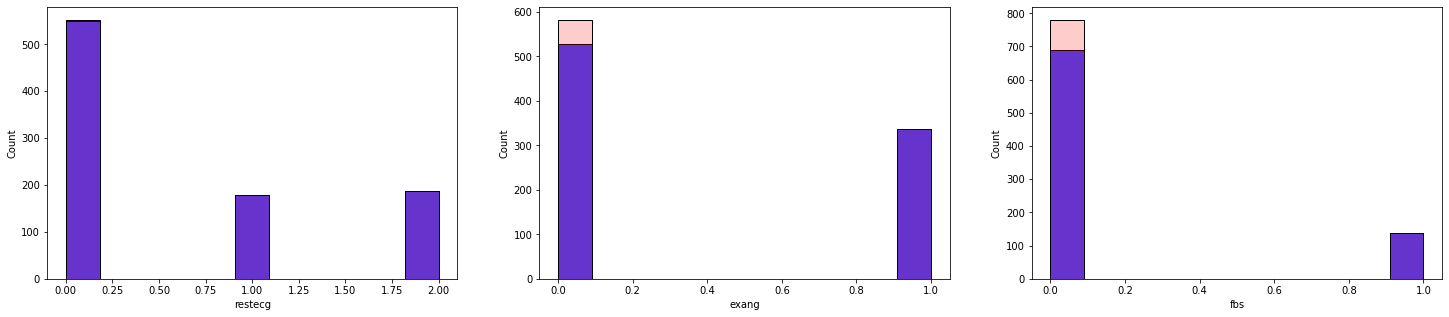

In [ ]:
#@title Method 1: impute all na with median/mode

df_si = df_no_duplicates.copy()
missing_numeric = ['oldpeak', 'trestbps', 'thalach', 'chol']
missing_categorical = ['restecg', 'exang', 'fbs']
impute_cat(df_si, missing_categorical)
impute_num(df_si, missing_numeric)

plot_numeric_imputation(df_no_duplicates, df_si, missing_numeric)
plot_categorical_imputation(df_no_duplicates, df_si, missing_categorical)



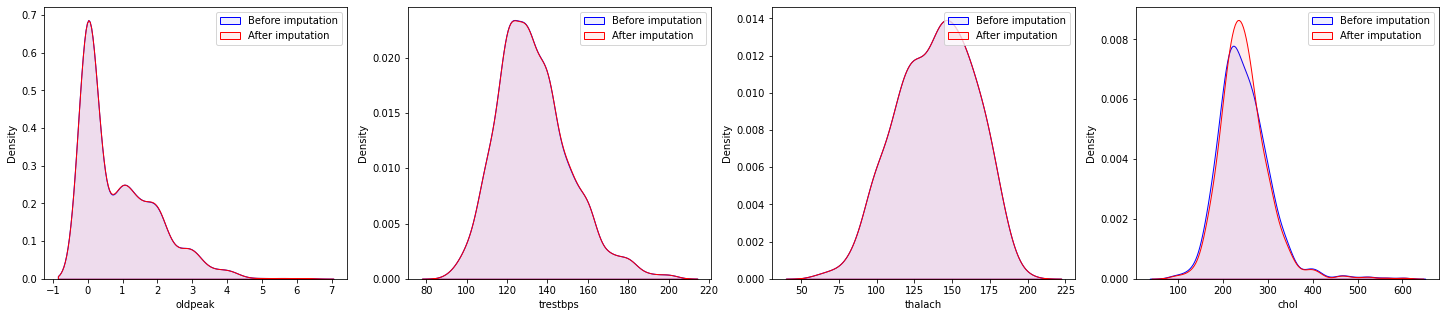

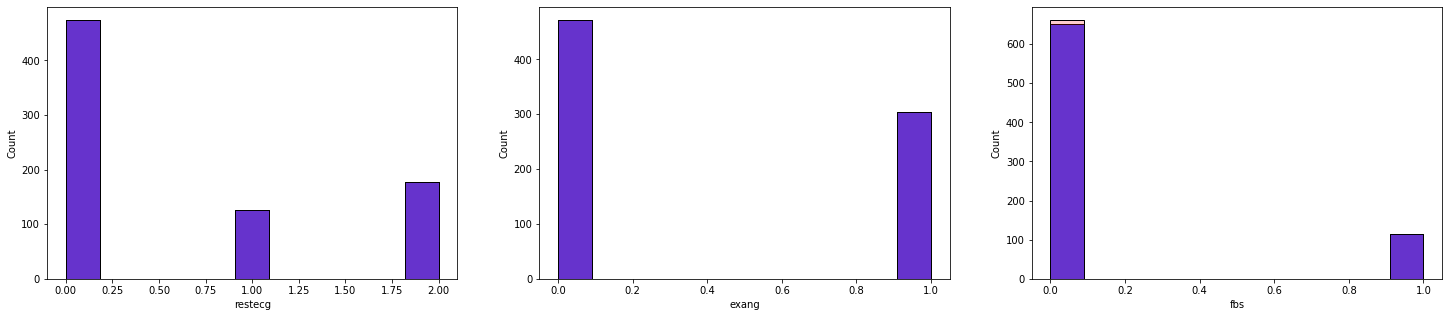

In [ ]:
#@title Method 2: drop rows with more than 1 missing value ( ML imputation )

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score

def impute_ml(m, data=pd.DataFrame, col=str):
    data[col + "_missing"] = data[col].isna().astype(int)
    missing_rows = data[col].isna()
    train_df = data[~missing_rows]
    train_df = train_df[~train_df.isna().any(axis=1)]
    impute_df = data[missing_rows]

    x_tr = train_df.drop(col, axis=1)
    y_tr = train_df[col]

    m.fit(x_tr, y_tr)
    y_model = m.predict(impute_df.drop(col, axis=1))
    data.loc[data[col].isna(),col]=y_model

df_mli = df_no_duplicates.copy()[df_no_duplicates.isna().sum(axis=1) < 2]
df_mli_copy = df_mli.copy()

impute_ml(RandomForestClassifier(), df_mli, 'fbs')
impute_ml(RandomForestClassifier(), df_mli, 'restecg')
impute_ml(RandomForestRegressor(), df_mli, 'trestbps')
impute_ml(RandomForestRegressor(), df_mli, 'chol')
impute_ml(RandomForestRegressor(), df_mli, 'oldpeak')


plot_numeric_imputation(df_mli_copy, df_mli, missing_numeric)
plot_categorical_imputation(df_mli_copy, df_mli, missing_categorical)

As a result of data imputation we have 2 datasets :

 - **df_mli** - dataset with ML imputation
 - **df_si** - dataset with simple median/mode imputation

## Selecting Data


Correlation analysis in EDA showed that correlation between the features is low.

Now let's perform statistical significance tests.

### Chi square test for categorical data

In [ ]:
#@title functions

from pandas.core.strings.accessor import isna
from itertools import combinations
from scipy.stats import chi2_contingency

def test(col1=pd.Series, col2=pd.Series, alpha=float):
  data_cont=pd.crosstab(col1, col2)
  p_value = chi2_contingency(data_cont)[1]
  return p_value > alpha

def color_df(x):
  if x == True:
    return 'color: %s' % 'red'
  elif isna(x): return None
  else: return 'color: %s' % 'green'

def show_chi_square_results(data=pd.DataFrame):
  categorical = ['sex','cp','fbs','restecg','exang', 'disease']
  cmb = list(combinations(categorical, 2))

  chi_square_results_df = pd.DataFrame(index = categorical, columns = categorical)
  for c in cmb:
    res = test(df_eda[c[0]], df_eda[c[1]], 0.05)
    chi_square_results_df.loc[c[0], c[1]] = res
    chi_square_results_df.loc[c[1], c[0]] = res

  return chi_square_results_df.style.applymap(color_df)


In [ ]:
show_chi_square_results(df_si)

,sex,cp,fbs,restecg,exang,disease
sex,nan,False,False,True,False,False
cp,False,nan,True,False,False,False
fbs,False,True,nan,False,True,False
restecg,True,False,False,nan,False,False
exang,False,False,True,False,nan,False
disease,False,False,False,False,False,nan


In [ ]:
show_chi_square_results(df_mli)

,sex,cp,fbs,restecg,exang,disease
sex,nan,False,False,True,False,False
cp,False,nan,True,False,False,False
fbs,False,True,nan,False,True,False
restecg,True,False,False,nan,False,False
exang,False,False,True,False,nan,False
disease,False,False,False,False,False,nan


There are no independent variables for the target variable for both datasets.

### Statistical significance testing for numeric features

We perform two-tailed two sample t-test.

**Null Hypothesis:** The means of features for patients with heart disease and healthy patients are the same.

**Alternative hypothesis:** There are statistically significant differences in the feature means for the healthy and sick patients.

In [ ]:
#@title functions
from scipy.stats import ttest_ind

def test_numeric(data = pd.DataFrame, col=str):
  _, p = ttest_ind(data[col], data['disease'], equal_var=False)
  return p

def show_ttest_results(data=pd.DataFrame):
  results = [(col, test_numeric(data, col))  for col in ['chol', 'trestbps', 'age', 'oldpeak', 'thalach']]
  return pd.DataFrame(results, columns = ['Column', 'p-value'])


In [ ]:
show_ttest_results(df_mli)

,Column,p-value
0,chol,0.000000e+00
1,trestbps,0.000000e+00
2,age,0.000000e+00
3,oldpeak,3.991557e-18
4,thalach,0.000000e+00


In [ ]:
show_ttest_results(df_si)

,Column,p-value
0,chol,0.000000e+00
1,trestbps,0.000000e+00
2,age,0.000000e+00
3,oldpeak,4.672572e-17
4,thalach,0.000000e+00


We reject null hypothesis for both datasets ans state that there are statistically significant differences in the feature means for the healthy and sick patients. We keep all the features.

## One hot encoding

In [ ]:
def encode_dummy(data = pd.DataFrame, drop_first=True):
  df = data.copy()
  for col in ['cp', 'restecg']:
    dummy = pd.get_dummies(df[col], prefix = col,drop_first=drop_first)
    df = pd.concat([df, dummy], axis=1)
    df.drop(col, axis=1, inplace=True)
  return df

df_si_dummy = encode_dummy(df_si)
df_mli_dummy = encode_dummy(df_mli)
df_si_dummy.head(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,disease,restecg_missing,...,fbs_missing,oldpeak_missing,trestbps_missing,thalach_missing,chol_missing,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0
0,32.0,1.0,95.0,240.0,0.0,127.0,0.0,0.7,1,0,...,1,0,0,0,1,0,0,0,0,0
1,34.0,1.0,115.0,240.0,0.0,154.0,0.0,0.2,1,1,...,1,0,0,0,1,0,0,1,0,0
2,35.0,1.0,130.0,240.0,0.0,130.0,1.0,0.5,1,0,...,1,1,1,0,1,0,0,1,0,0
3,36.0,1.0,110.0,240.0,0.0,125.0,1.0,1.0,1,0,...,1,0,0,0,1,0,0,1,0,0
4,38.0,0.0,105.0,240.0,0.0,166.0,0.0,2.8,1,0,...,1,0,0,0,1,0,0,1,0,0
5,38.0,0.0,110.0,240.0,0.0,156.0,0.0,0.0,1,0,...,0,0,0,0,1,0,0,1,0,0
6,38.0,1.0,100.0,240.0,0.0,179.0,0.0,0.5,0,0,...,1,1,0,0,1,0,1,0,0,0
7,38.0,1.0,115.0,240.0,0.0,128.0,1.0,0.0,1,0,...,0,0,0,0,1,0,1,0,0,0
8,38.0,1.0,135.0,240.0,0.0,150.0,0.0,0.0,1,0,...,1,0,0,0,1,0,0,1,0,0
9,38.0,1.0,150.0,240.0,0.0,120.0,1.0,0.5,1,0,...,1,1,0,0,1,0,0,1,0,0


## Feature Scaling

Normalization/Standardization

Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled.         
Distance algorithms like KNN, K-means, and SVM are most affected by the range of features Normalization/Standardization.Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.



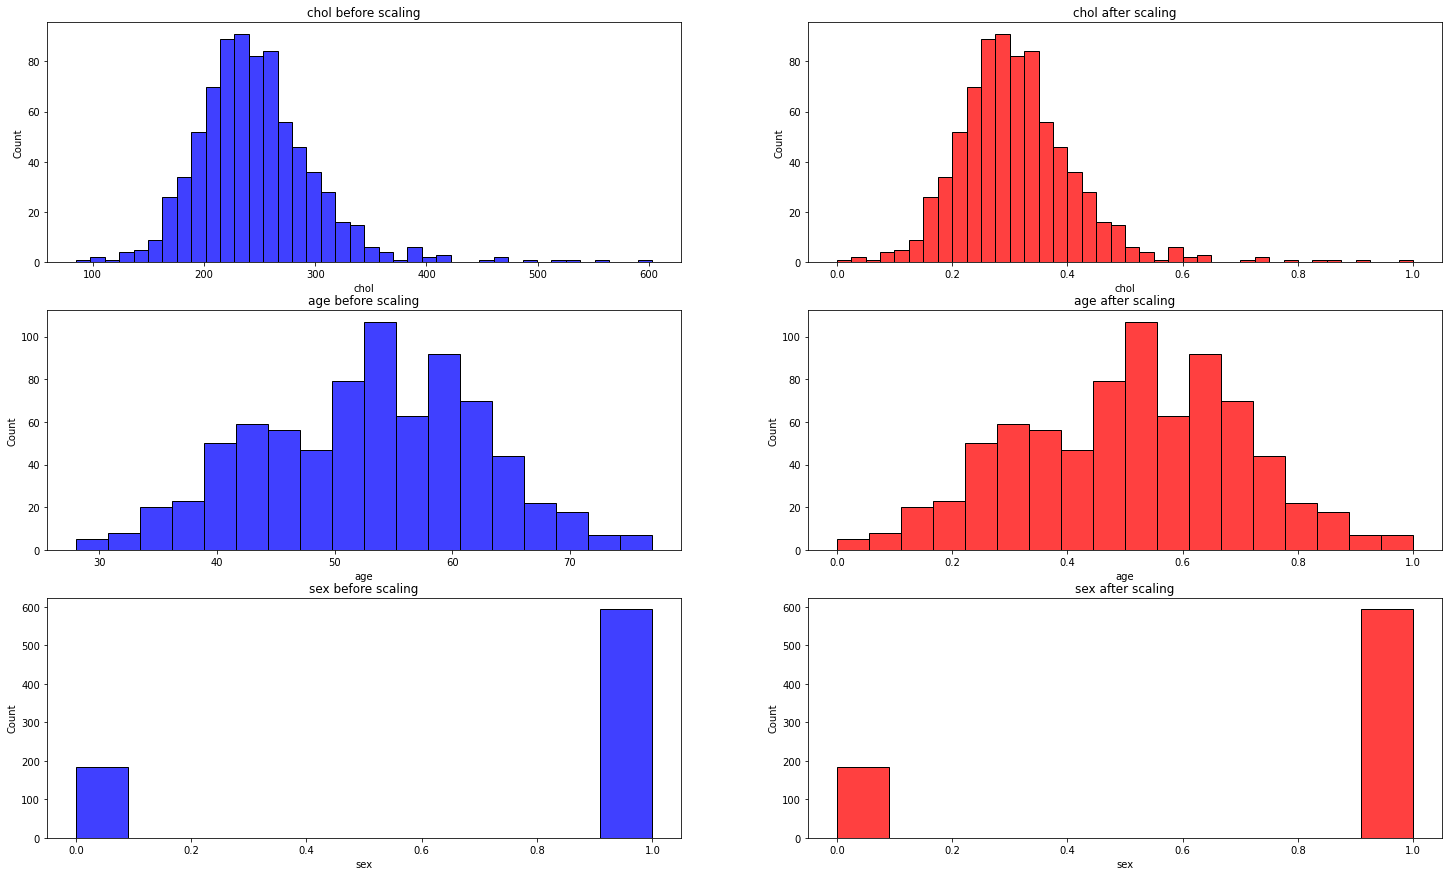

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale(data=pd.DataFrame):
  return pd.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns)

df_si_scaled = scale(df_si_dummy)
df_mli_scaled = scale(df_mli_dummy)

def plot_normalization(data_before=pd.DataFrame, data_after=pd.DataFrame, cols=str):
  fig, axs = plt.subplots(len(cols), 2, figsize = (25, 15))
  for i, col in enumerate(cols):
    sns.histplot(data_before[col], color='b', ax = axs[i, 0])
    axs[i, 0].title.set_text(col + ' before scaling')
    sns.histplot(data_after[col], color='r', ax = axs[i, 1])
    axs[i, 1].title.set_text(col + ' after scaling')

plot_normalization(df_mli_dummy, df_mli_scaled, ['chol', 'age', 'sex'])


#Modeling

### Datasets

- **df_mli** - Data imputation with RandomForest. Dropped rows with more than 1 missing value
- **df_si** - Data imputation with simple median/mode imputation


- **[df_mli/df_si]_dummy** - Dataset with one hot encoding
- **[df_mli/df_si]_scaled** - Dataset with one hot encoding and normalization applied



## Random forest

Random forest doesn't require one hot encoding of categorical variables and scaling. We train it on unscaled data with ML imputation (df_mli) and simple (median/mode) imputation (df_si).

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def run(model, data = pd.DataFrame):
  X = data.drop('disease', axis=1)
  Y = data['disease']

  Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=123)
  model.fit(Xtrain, ytrain)
  y_model = model.predict(Xtest)
  return accuracy_score(ytest, y_model), model

results = []

acc, rf_model = run(RandomForestClassifier(random_state=0), df_si)
results.append({"model":"Random Forest", "imputation":"median/mode", "preprocessing":"No", "accuracy":acc})
print("Random forest accuracy for median/mode imputation", acc)

acc, rf_model = run(RandomForestClassifier(random_state=0), df_mli)
results.append({"model":"Random Forest", "imputation":"ML", "preprocessing":"No", "accuracy":acc})
print("Random forest accuracy for ML imputation", acc)



Random forest accuracy for median/mode imputation 0.7753623188405797
Random forest accuracy for ML imputation 0.8461538461538461


## Logistic regression

We use one-hot encodded and scaled datasets for logistic regression.

In [ ]:
acc, model = run(LogisticRegression(), df_si_scaled)
results.append({"model":"Logistic Regression", "imputation":"median/mode", "preprocessing":"One-hot encoding + normalization", "accuracy":acc})
print("Logistic regression accuracy for median/mode imputation", acc)

acc, model = run(LogisticRegression(), df_mli_scaled)
results.append({"model":"Logistic Regression", "imputation":"ML", "preprocessing":"One-hot encoding + normalization", "accuracy":acc})
print("Logistic regression accuracy for ML imputation", acc)

Logistic regression accuracy for median/mode imputation 0.7934782608695652
Logistic regression accuracy for ML imputation 0.8333333333333334


## Neural network

  In this part, we use the pytorch deep learning framework to build a neural network model. Unlike other models, we need to convert samples from numpy to tensor as the input of the model.
  During the model training process, we mainly adjust the model structure and the number of neurons. , optimize the function, learning rate, activation function and classification threshold to obtain a better effect.
  Considering the small sample size (less than 1000), we built a three-layer neural network (input, hidden & output), the output layer uses the sigmoid activation function to complete the binary classification, and does not use a complex model structure to avoid overfitting .
  When RMSprop is used as the optimization function, the learning rate is adjusted between 0.02-0.05, and the hidden layer uses sigmoid as the activation function, the effect is better.

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

class Mnist_NN(nn.Module):
    def __init__(self, fea_num):
        super().__init__()
        self.hidden1 = nn.Linear(fea_num, 32)
        self.out  = nn.Linear(32, 1)
        #self.out  = nn.Linear(15, 1)

    def forward(self, x):
        x = torch.sigmoid(self.hidden1(x))
        x = torch.sigmoid(self.out(x))
        return x

def get_data(data = pd.DataFrame):
  X = data.drop('disease', axis=1)
  Y = data['disease']
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=127)
  train_X = torch.tensor(np.array(Xtrain)).to(torch.float32)
  train_Y = torch.LongTensor(np.array(ytrain)).to(torch.float32)
  test_X = torch.tensor(np.array(Xtest)).to(torch.float32)
  test_Y = np.array(ytest)
  return train_X, train_Y, test_X, test_Y

def cal_best(models, test_X, test_Y):
  models.eval()
  out = models(test_X)
  _out = out.squeeze(dim=-1).detach().numpy()
  minyz = 0.3
  tacc, tyz = 0, 0
  while round(minyz, 1) <= 0.9:
    pl = [1 if item >= minyz else 0 for item in _out]
    acc = accuracy_score(pl, test_Y)
    if acc > tacc:
      tacc = acc
      tyz = minyz
    minyz += 0.01
  return tacc, tyz

def train_eval(data = pd.DataFrame):
  fea_num = len(data.columns) - 1
  model = Mnist_NN(fea_num)
  #opt = optim.SGD(model.parameters(), lr=0.05, momentum=0.8) #0.85
  #opt = optim.SGD(model.parameters(), lr=0.02, momentum=0.8) #0.85
  opt = optim.RMSprop(model.parameters(), lr=0.05, alpha=0.9) #0.87
  #loss_func = nn.BCEWithLogitsLoss()
  loss_func = nn.BCELoss()

  train_X, train_Y, test_X, test_Y = get_data(data)
  batch_num = 1
  acc, thre = 0, 0
  for st in range(1000):
      model.train()
      out = model(train_X)
      _out = out.squeeze(dim=-1)
      loss = loss_func(_out, train_Y)
      opt.zero_grad()
      loss.backward()
      opt.step()
      if batch_num % 10 == 0:
        #print("batch:",batch_num," loss:",loss.data.numpy())
        bacc, bthre = cal_best(model, test_X, test_Y)
        if bacc > acc:
          acc = bacc
          thre = bthre
      batch_num += 1
  return acc, round(thre, 2)

acc, thre = train_eval(df_mli)
results.append({"model":"Neural network", "imputation":"ML", "preprocessing":"No", "accuracy":acc})
print ("NN accuracy for ML imputed dataset: ", acc)

acc, thre = train_eval(df_mli_scaled)
results.append({"model":"Neural network", "imputation":"ML", "preprocessing":"One-hot encoding + normalization", "accuracy":acc})
print ("NN accuracy for ML imputed dataset, one-hot encoded, scaled: ", acc)


acc, thre = train_eval(df_si)
results.append({"model":"Neural network", "imputation":"median/mode", "preprocessing":"No", "accuracy":acc})
print ("NN accuracy for median/mode imputed dataset: ", acc)


acc, thre = train_eval(df_si_scaled)
print ("NN accuracy for median/mode imputed dataset, one-hot encoded, scaled", acc)
results.append({"model":"Neural network", "imputation":"median/mode", "preprocessing":"One-hot encoding + normalization", "accuracy":acc})

NN accuracy for ML imputed dataset:  0.5128205128205128
NN accuracy for ML imputed dataset, one-hot encoded, scaled:  0.8333333333333334
NN accuracy for median/mode imputed dataset:  0.6195652173913043
NN accuracy for median/mode imputed dataset, one-hot encoded, scaled 0.8804347826086957


We can see that one-hot encoded and scaled datasets produced much better results.

## SVM

There are many model parameters and they are not easy to choose, so we use the GridSearchCV tool in sklearn to help us complete the parameter selection. The main parameters include kernel, C and gamma

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV


def run(data = pd.DataFrame):
  X = data.drop('disease', axis=1)
  Y = data['disease']

  Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=127)
  model = svm.SVC()
  parameters = {'kernel':('linear', 'rbf'), 'C':[1], 'gamma':[0.05, 0.07, 0.125, 0.25, 0.5]}
  clf = GridSearchCV(model, parameters, scoring='accuracy')
  clf.fit(Xtrain, ytrain)
  y_model = clf.predict(Xtest)
  return accuracy_score(ytest, y_model), clf.best_params_

acc, model = run(df_mli)
results.append({"model":"SVM", "imputation":"ML", "preprocessing":"No", "accuracy":acc})
print("SVM accuracy for ML imputed dataset:", acc, " model: ", model)

acc, model = run(df_mli_scaled)
results.append({"model":"SVM", "imputation":"ML", "preprocessing":"One-hot encoding + normalization", "accuracy":acc})
print("SVM accuracy for ML imputed dataset, one-hot encoded, scaled:", acc, " model: ", model)

acc, model = run(df_si)
results.append({"model":"SVM", "imputation":"median/mode", "preprocessing":"No", "accuracy":acc})
print("SVM accuracy for median/mode imputed dataset", acc, " model: ", model)

acc, model = run(df_si_scaled)
results.append({"model":"SVM", "imputation":"median/mode", "preprocessing":"One-hot encoding + normalization", "accuracy":acc})
print("SVM accuracy for median/mode imputed dataset, one-hot encoded, scaled:", acc, " model: ", model)

SVM accuracy for ML imputed dataset: 0.8205128205128205  model:  {'C': 1, 'gamma': 0.05, 'kernel': 'linear'}
SVM accuracy for ML imputed dataset, one-hot encoded, scaled: 0.7948717948717948  model:  {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
SVM accuracy for median/mode imputed dataset 0.842391304347826  model:  {'C': 1, 'gamma': 0.05, 'kernel': 'linear'}
SVM accuracy for median/mode imputed dataset, one-hot encoded, scaled: 0.8152173913043478  model:  {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


The best accuracy was achieved with median/modeimputed dataset.

# Results evaluation and interpretaion

We use 'accuracy' as our main evaluation score, our target variable is well balanced.

The best score was achieved with neural network model. The accuracy of 87% was shown on the dataset with median/mode imputation and normalization applied.

In [ ]:
pd.DataFrame(results).sort_values(by=['accuracy'], ascending=False)

,model,imputation,preprocessing,accuracy
7,Neural network,median/mode,One-hot encoding + normalization,0.880435
1,Random Forest,ML,No,0.846154
10,SVM,median/mode,No,0.842391
3,Logistic Regression,ML,One-hot encoding + normalization,0.833333
5,Neural network,ML,One-hot encoding + normalization,0.833333
8,SVM,ML,No,0.820513
11,SVM,median/mode,One-hot encoding + normalization,0.815217
9,SVM,ML,One-hot encoding + normalization,0.794872
2,Logistic Regression,median/mode,One-hot encoding + normalization,0.793478
0,Random Forest,median/mode,No,0.775362


## Interpretation

We use information from the random forest feature importance to do interpretation.

From the random forest feature importance information we conclude that the most important variables for predicting heart disease are:

- Chest pain type (cp)
- Maximum heart rate achieved (thalach)
- Oldpeak
- Age
- Cholesterol

Meanwhile such parameters as blood sugar and the results of the electrocardiogram contributed the least to the heard disease prediction in our random forest model.

We can also see that most of the missing values indicators were not important for the model.

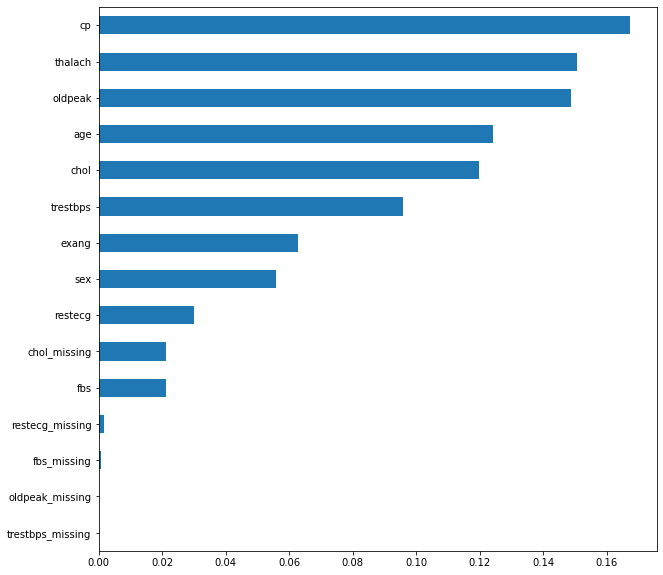

In [ ]:
(pd.Series(rf_model.feature_importances_, index=df_mli.drop(['disease'], axis=1).columns).sort_values().plot(kind='barh', figsize=(10,10)))

#Conclusion


  We performed exploratory data analysis and identified the key risk factors for heart disease.

  The dataset was cleaned and data imputation was performed in 2 different ways to compare the results.

  The dataset was preprocessed in different ways due to different requirements to data for individual machine learning algorithms.
  
  We have built multiple machine learning models using 4 different algorithms: Random Forest, Logistic regression, Neural Network, SVM. Each algorithm showed accuracy more than 80%. Neural network showed 87% accuracy.

  The obtained models are able to quickly diagnose patients with heart disease with accuracy of 80% and higher from medical information of an individual. Thus, we conclude that the models meet the business objectives and data mining goals.
